# Natbat Spectrogram Analysis

Importing the libraries needed for the whole python script.

In [1]:
import os
import wave
import matplotlib.pyplot as plt
import pylab
import imageio
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

## Defining paths and stuff
In this part we define the directories we're working out of, where we're saving and the template being used.

Make sure this script is saved in the same location as the call template and the audio files being analysed.

This next coding block is the only place where the person running this needs to input something, apart from the scaling factor which may want to be adjusted.
To change:

path                    - where the python file, call template and audio files are saved  

path2                   - where the spectrogram files are saved, MUST be a sub folder of the path

sub_folder              - same location as path2 just written differently, just input the sub folder name

sub_folder2             - a second sub folder within the sub_folder

call_template           - change for which bat you're interested in, MUST be saved with audio files and this script

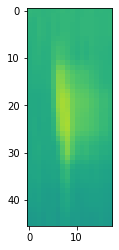

In [2]:
#Directory and file paths - INPUT the directory location of the audio files and run this script from the same place

# Where the audio files and python script are saved
path = "C:\\Users\\b8tay\\Downloads\\barn_testing" # this is the saved location of the .wav files
files = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith('.wav')] # ensures only .wav files are used

# The path for the spectrogram images
path2 = "C:\\Users\\b8tay\\Downloads\\barn_testing\\spec_images" # this is the saved location of the spectrogram images
spectrograms = [d for d in listdir(path2) if isfile(join(path2, d)) and d.endswith('.png')] # only .png files used

# The sub folders used when saving the images
sub_folder = os.path.join(path, 'spec_images/')  # for saving images in a sub folder
sub_folder2 = os.path.join(path, 'spec_images\identifying/')  # saves images in another sub folder


# Removing the .wav/.png from the end of a file name
# The spec one is not needed as used .cv2 instead to save but audio needed otherwise named: file.wav.png which i dont like
audio_no_ext = [".".join(files.split(".")[:-1]) for files in os.listdir() if os.path.isfile(files)]
spectrogram_no_ext = [".".join(spectrograms.split(".")[:-1]) for spectrograms in os.listdir() if os.path.isfile(spectrograms)]

# This defines and shows the template being used later
call_template = 'noctule_zoomed_in.png'    # change for different species of bats, get from tagged data
img = imageio.imread(call_template)
plt.imshow(img)

## Looping over the data
In this part we loop over the audio files within the specified directory and create a spectrogram of them which is saved as a .png file.


<ipython-input-3-693c50f62ff3>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  pylab.figure(num=None, figsize=(19, 12))


EOFError: 

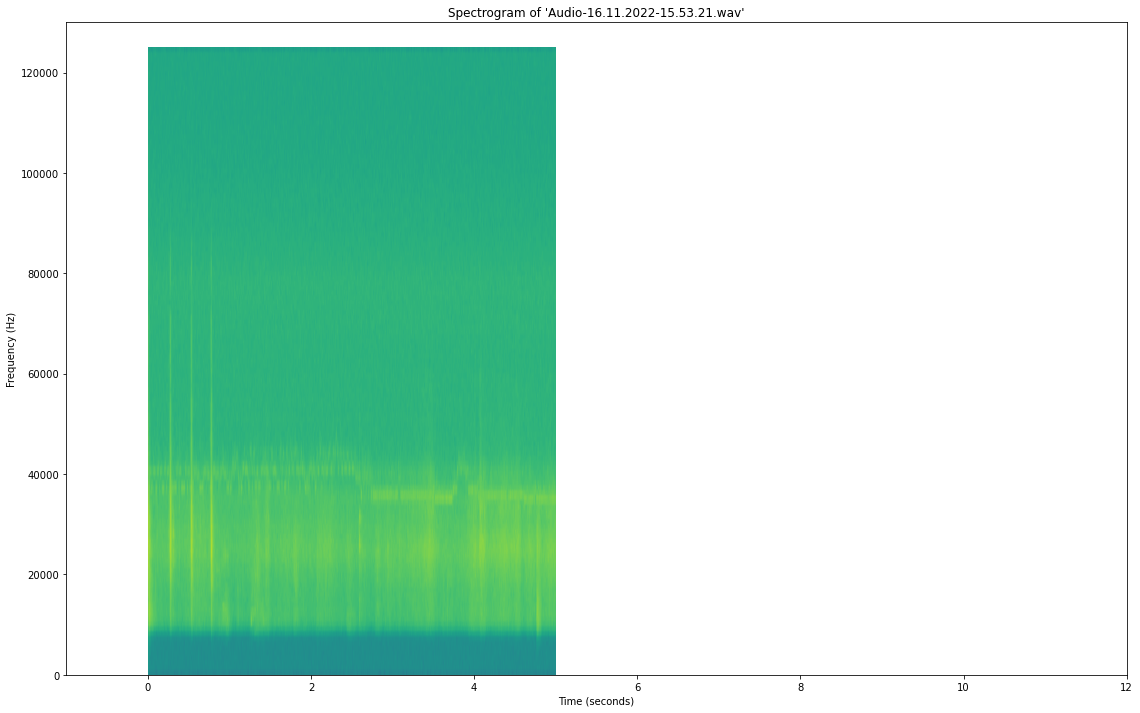

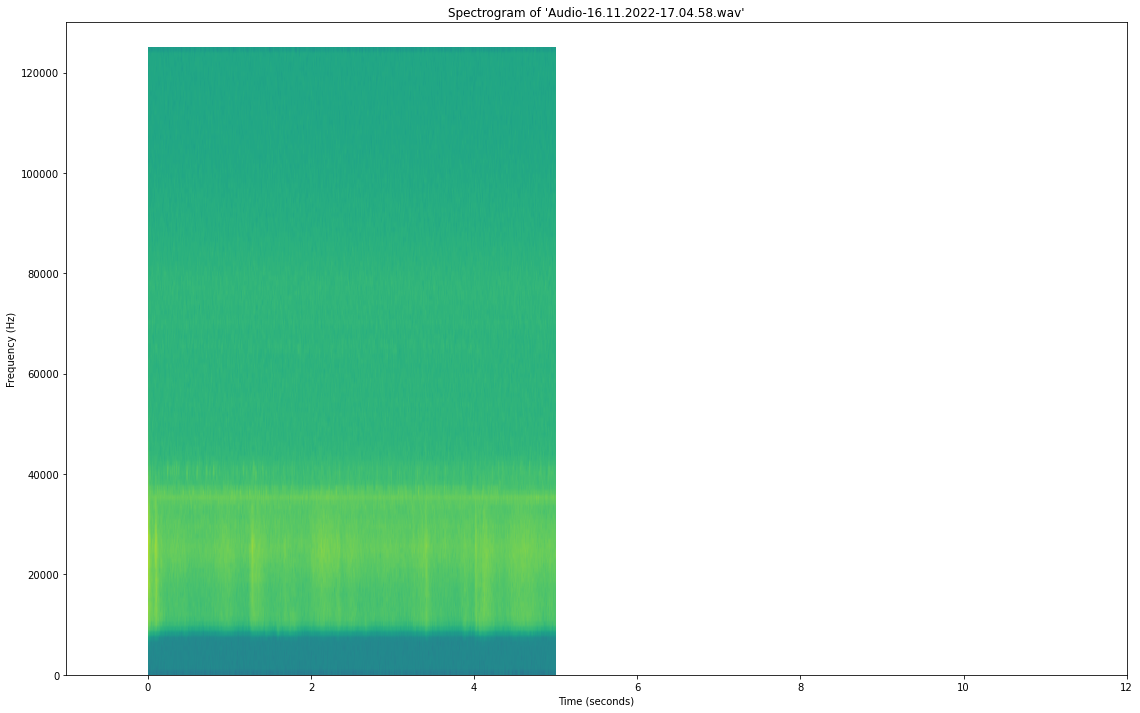

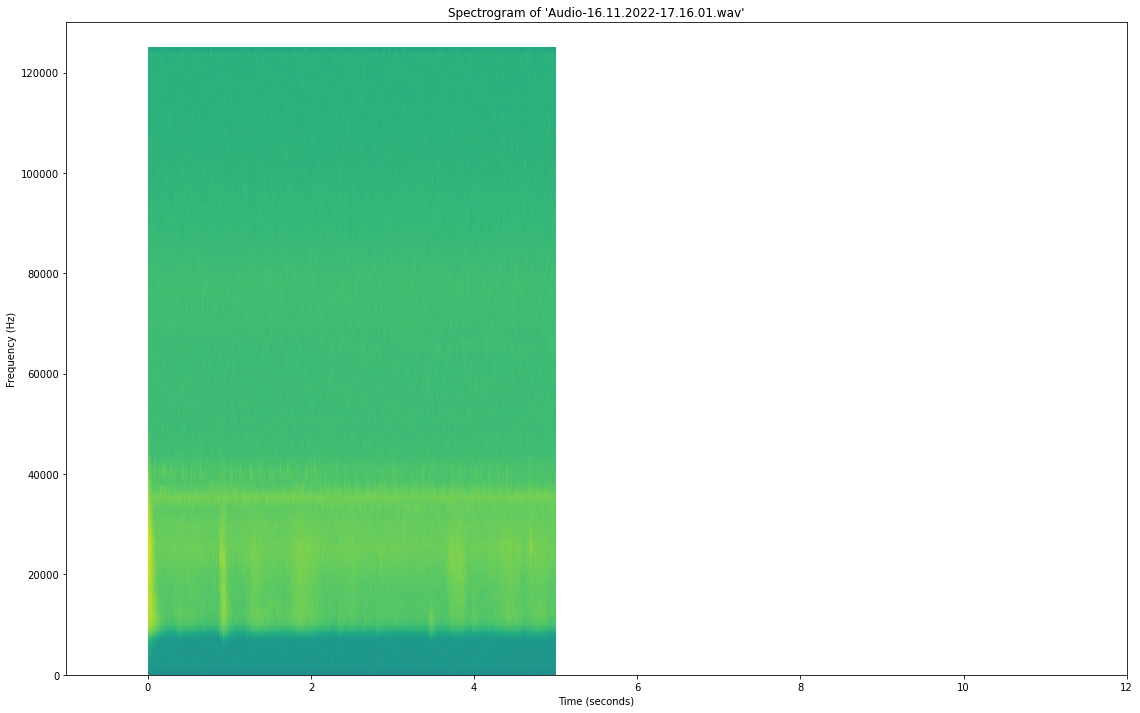

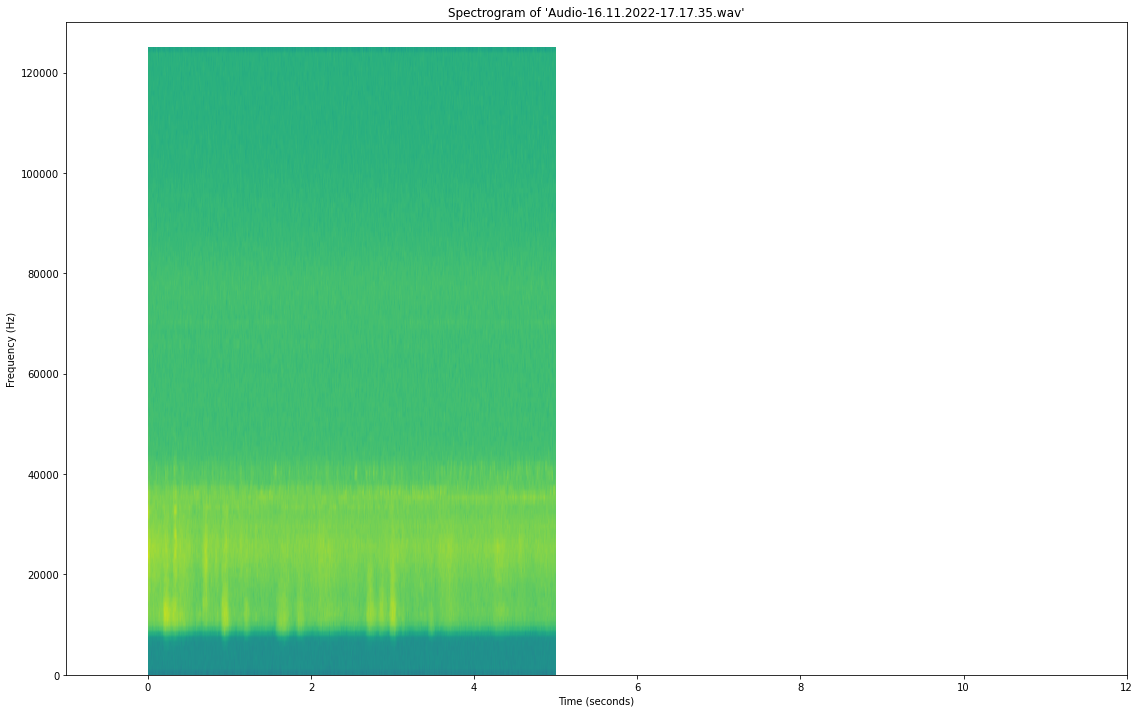

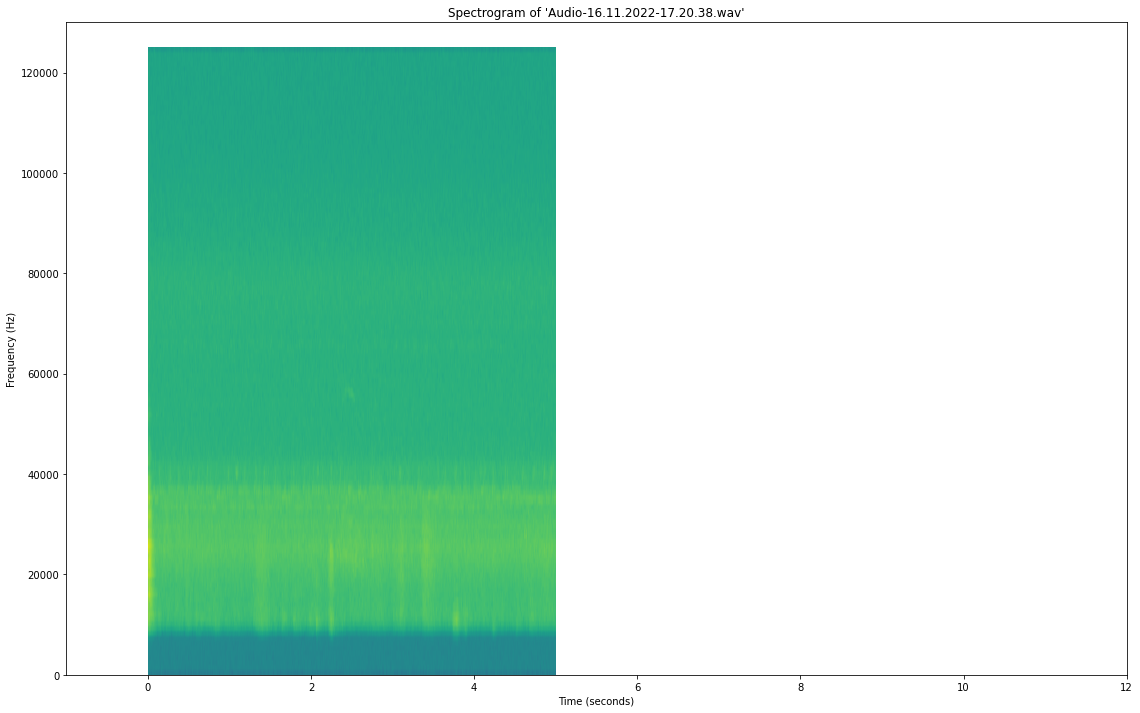

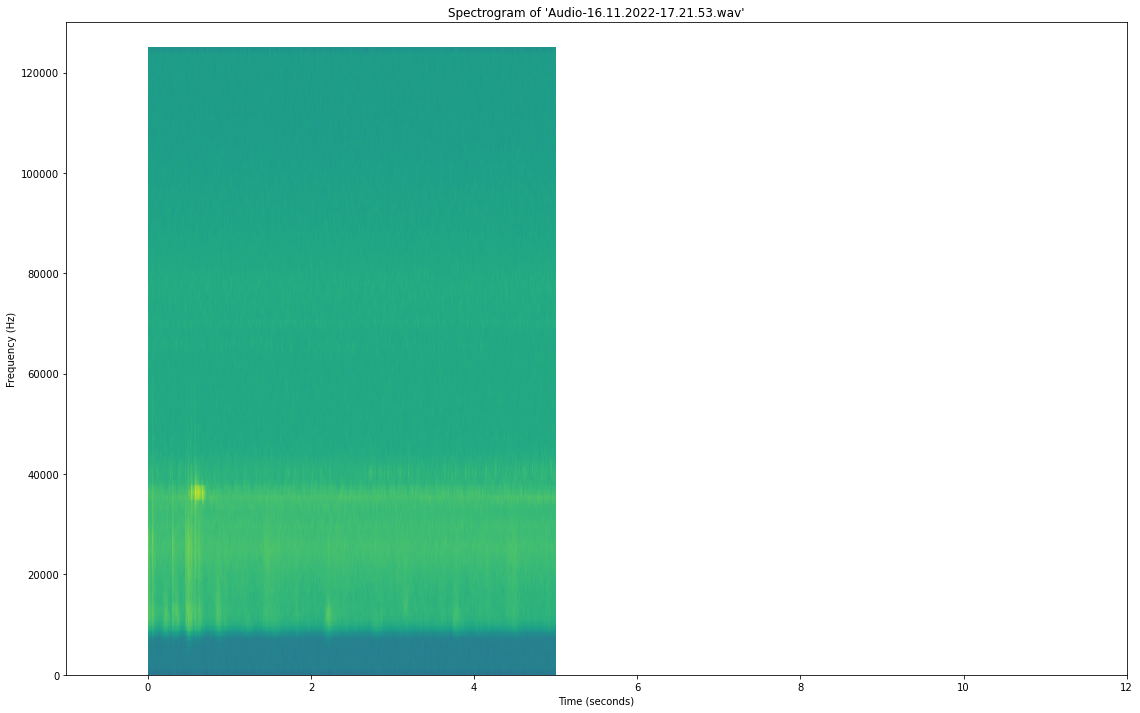

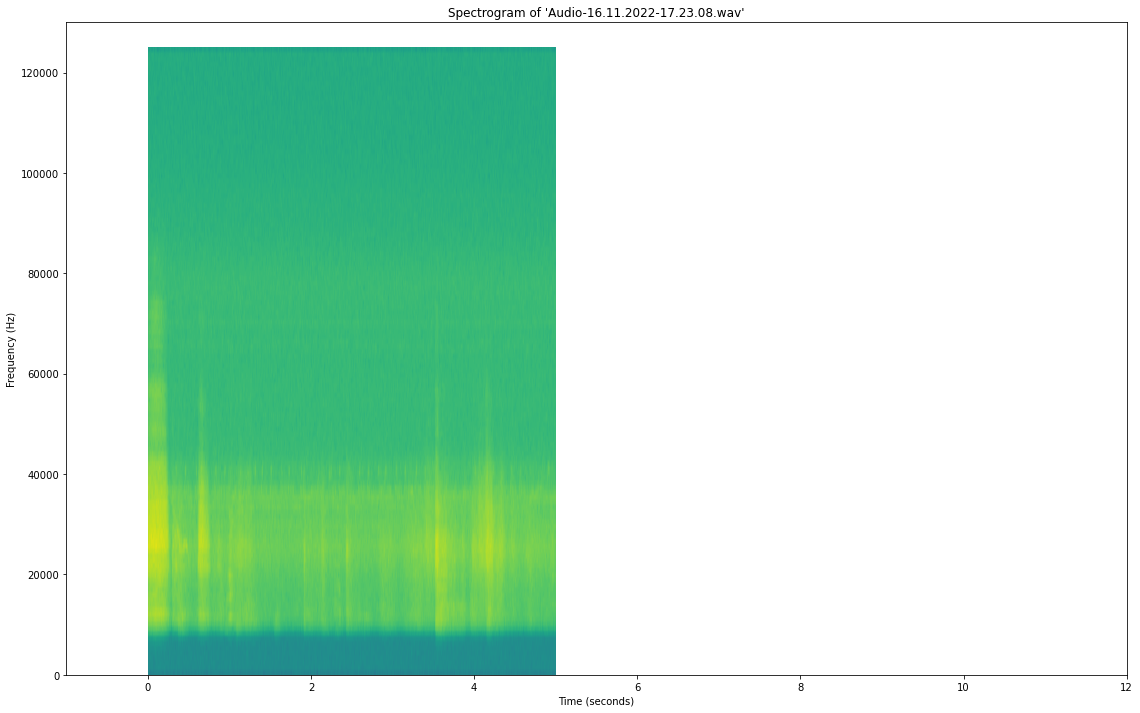

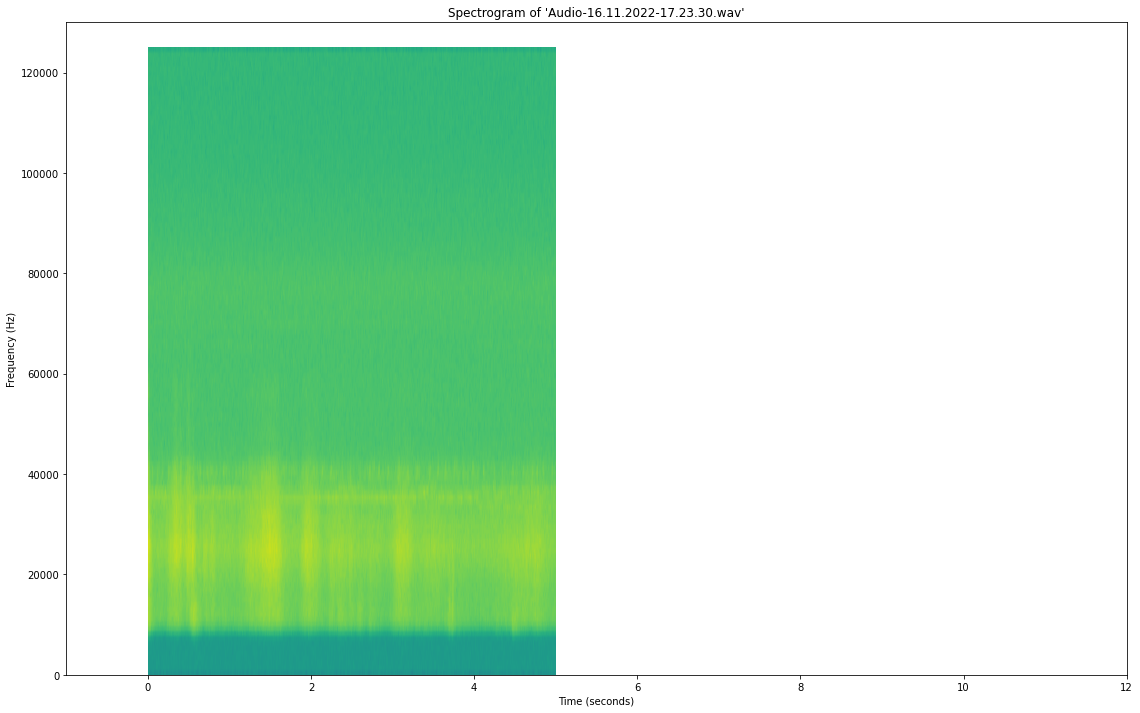

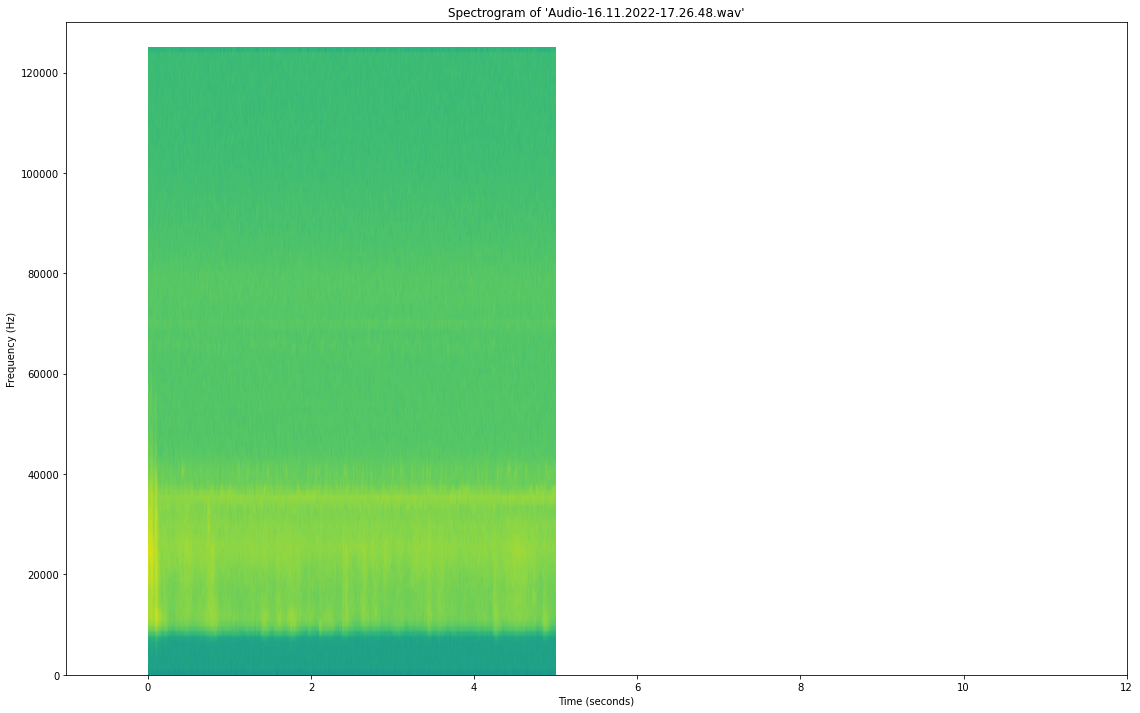

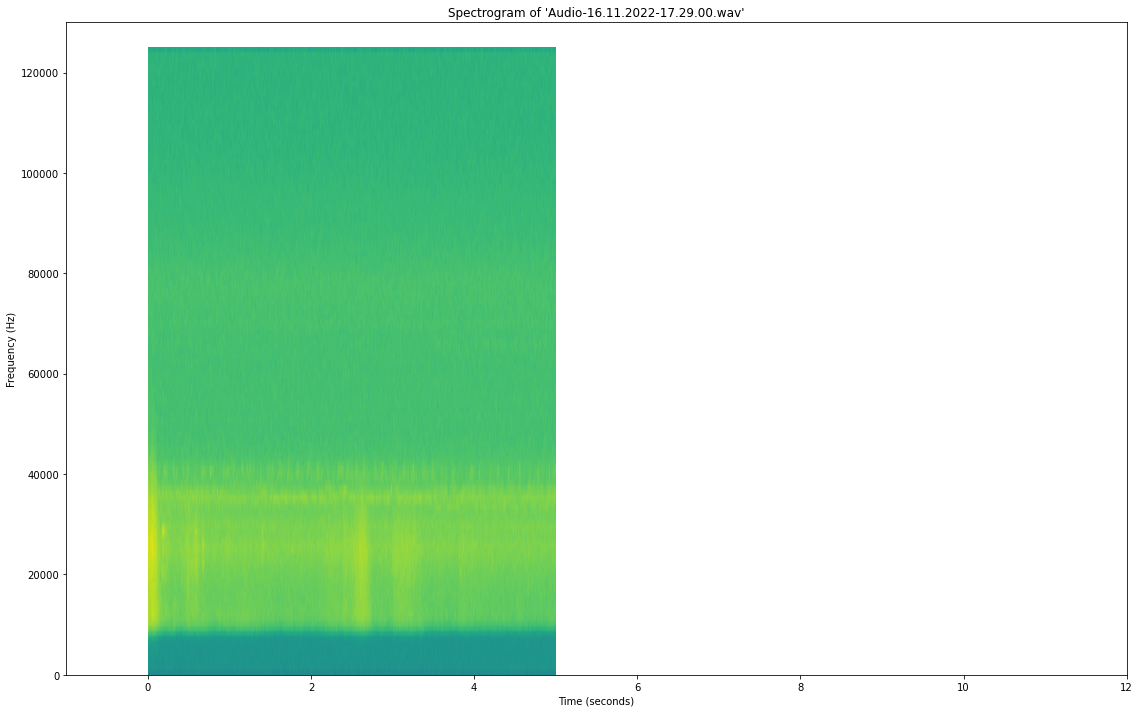

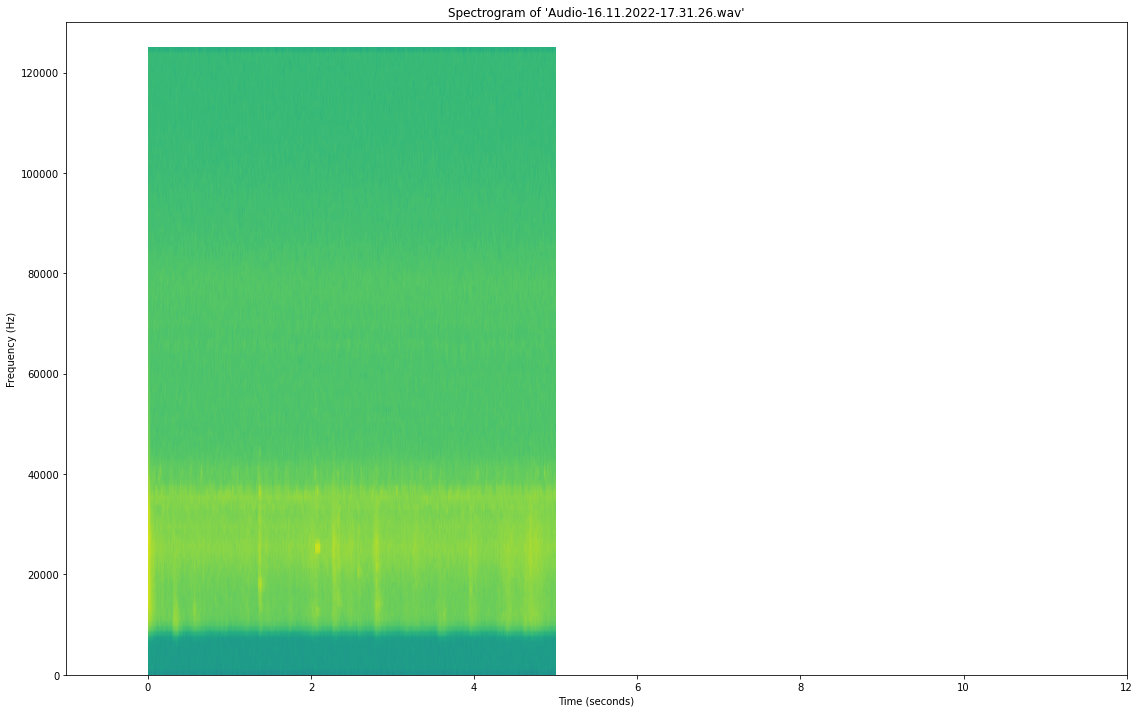

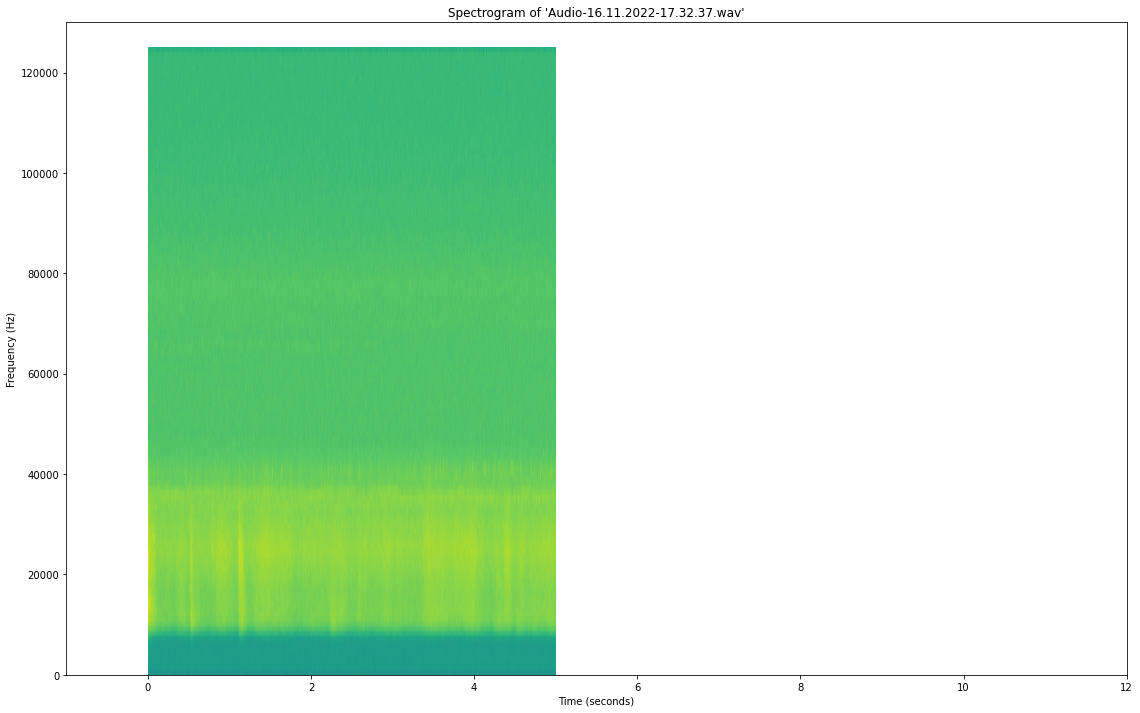

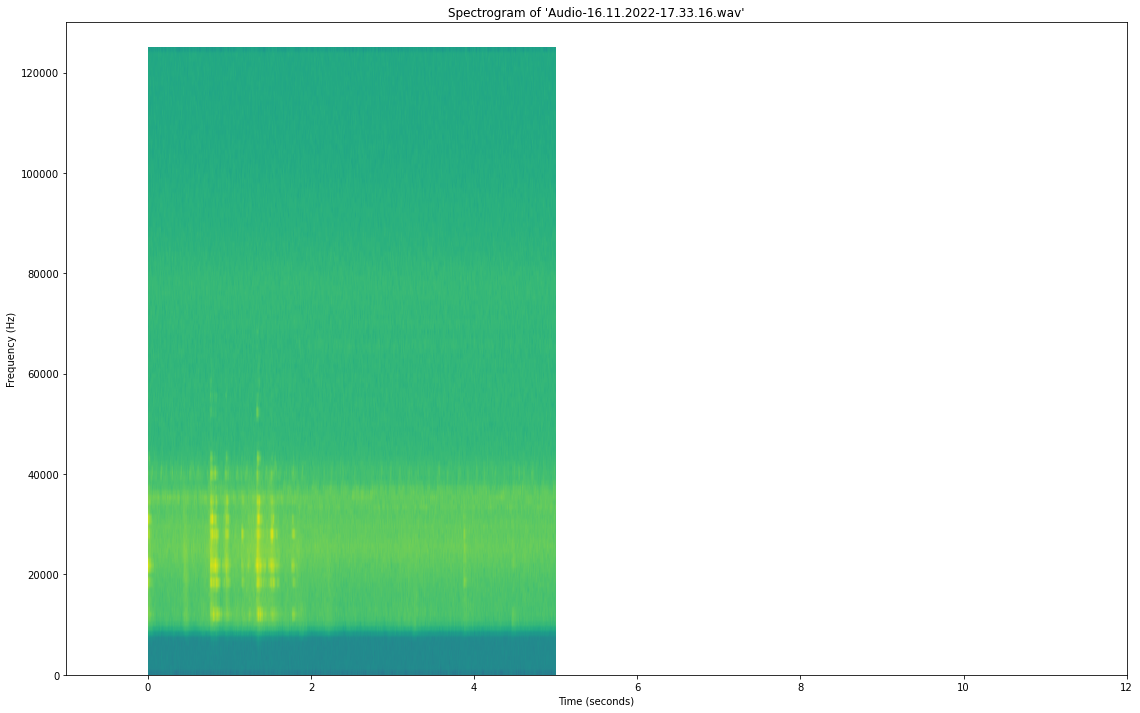

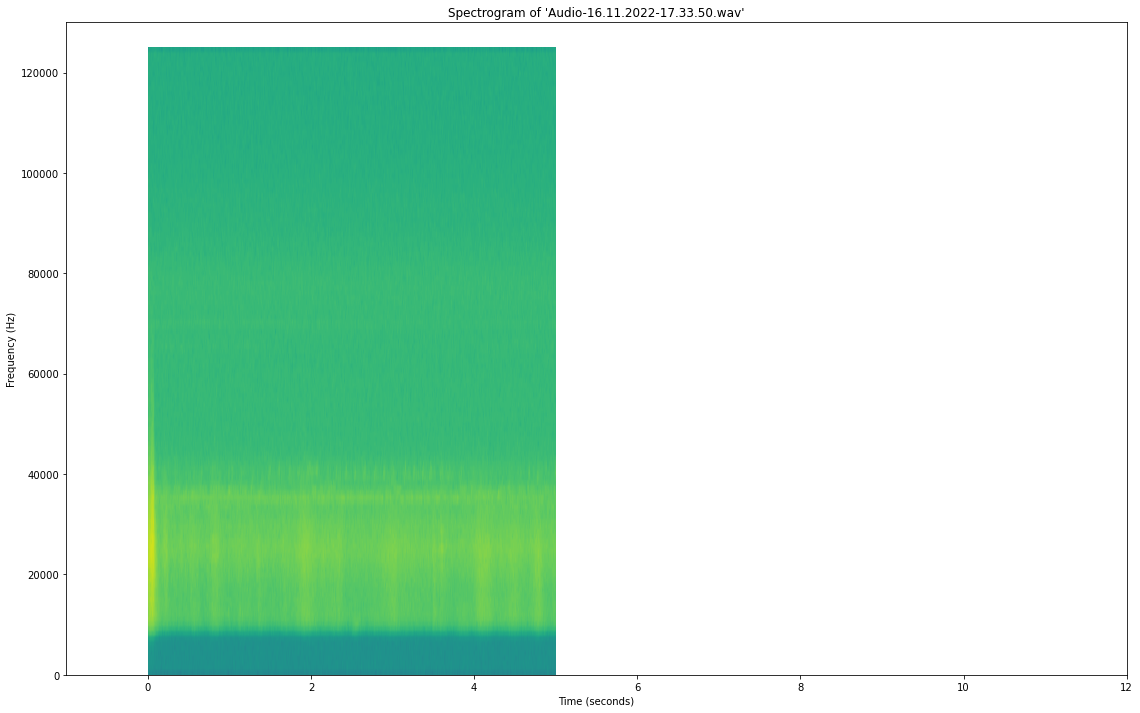

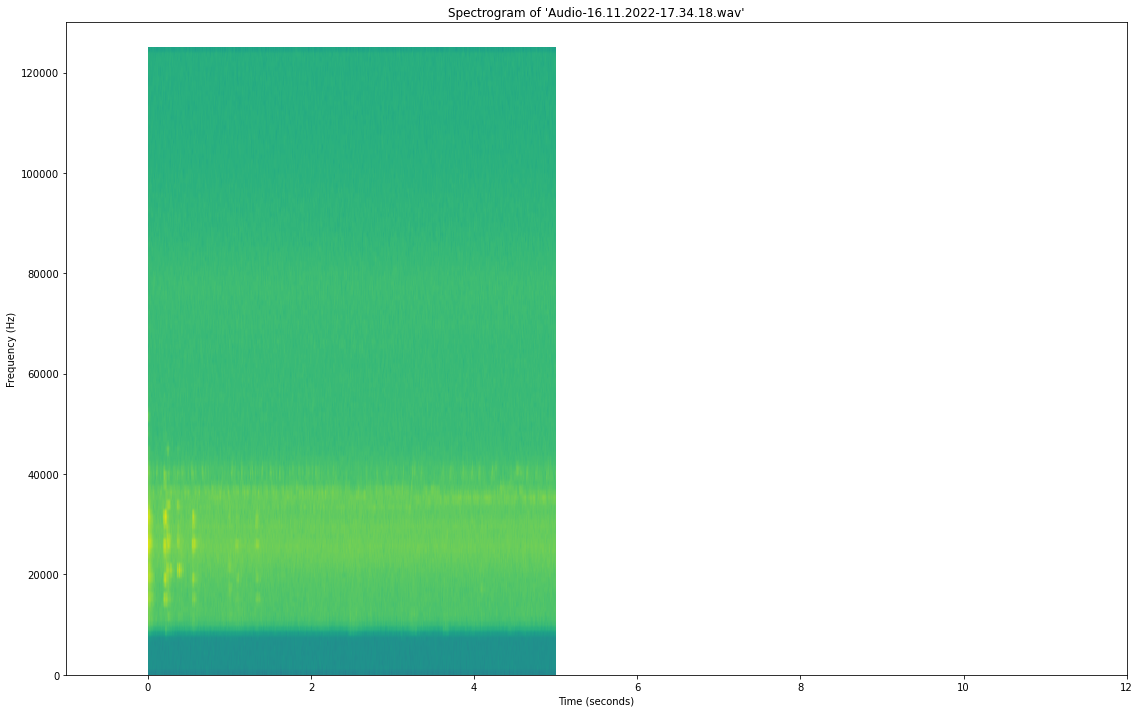

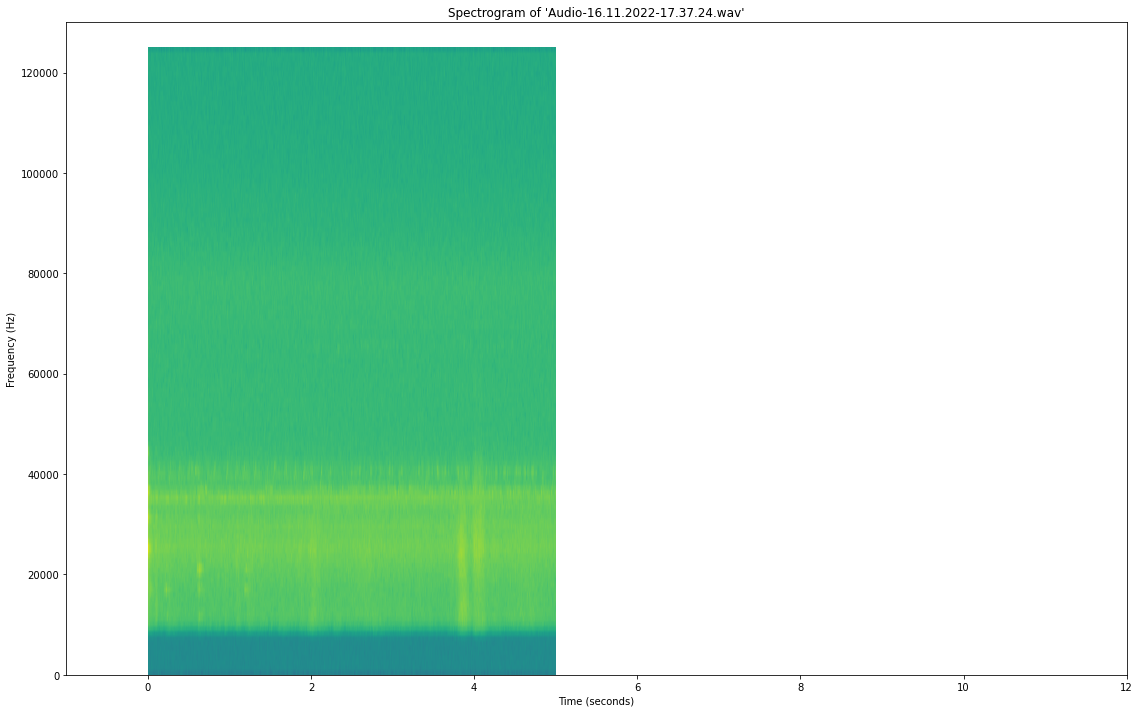

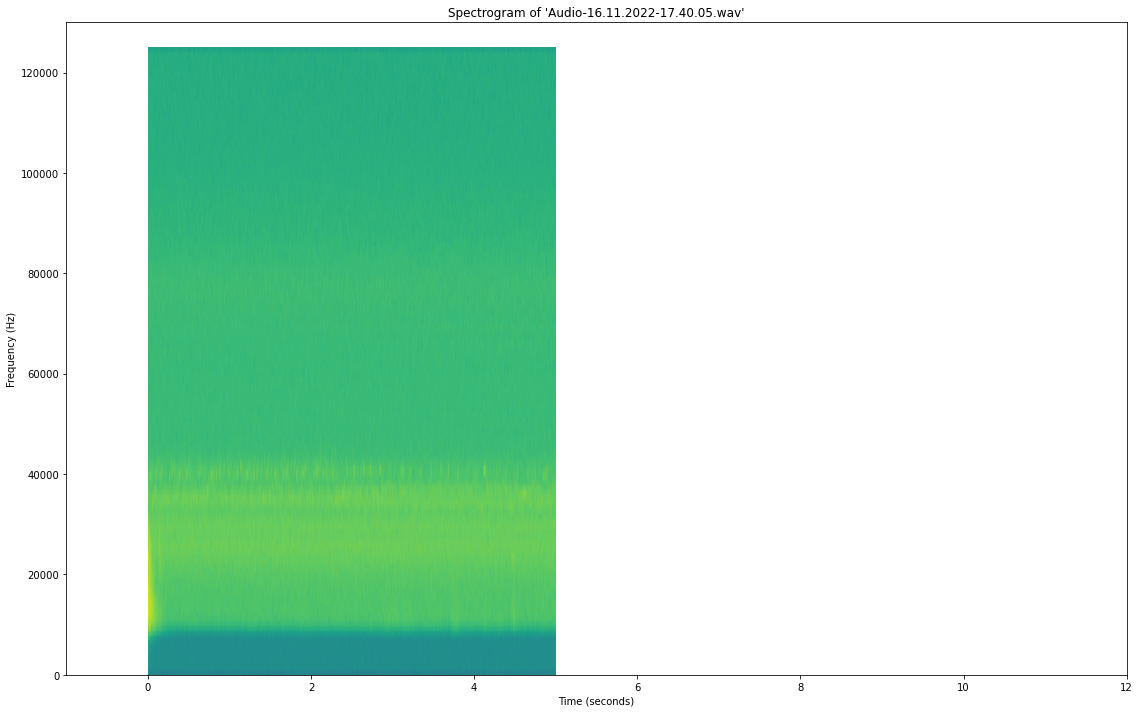

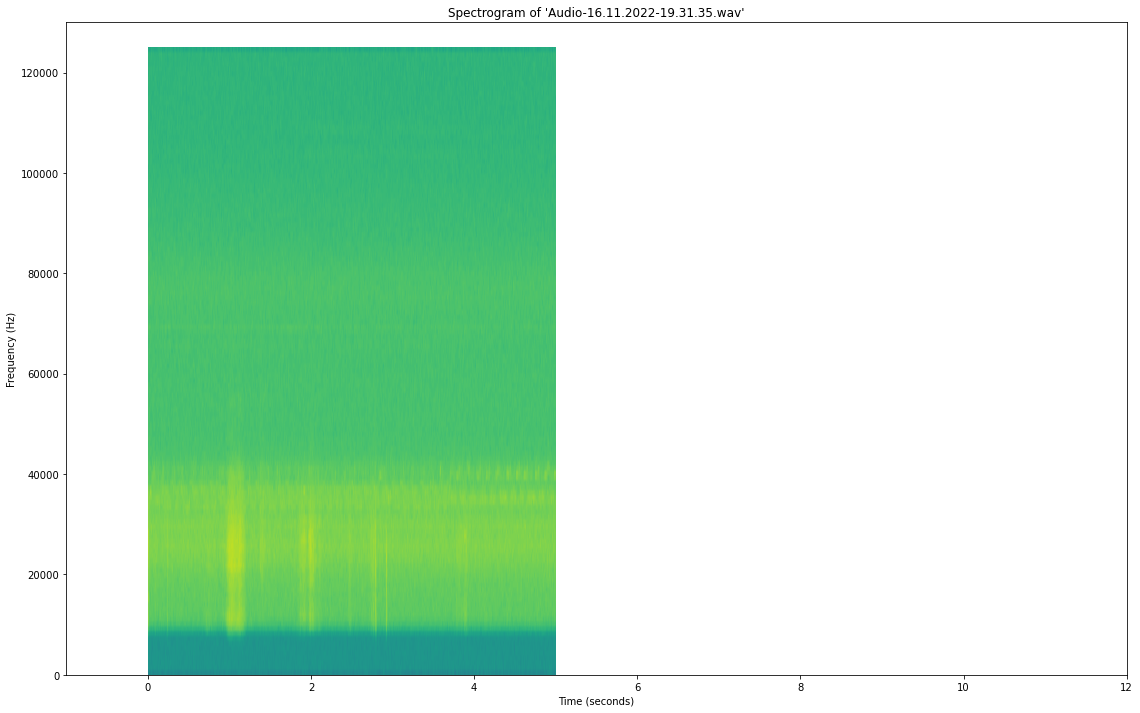

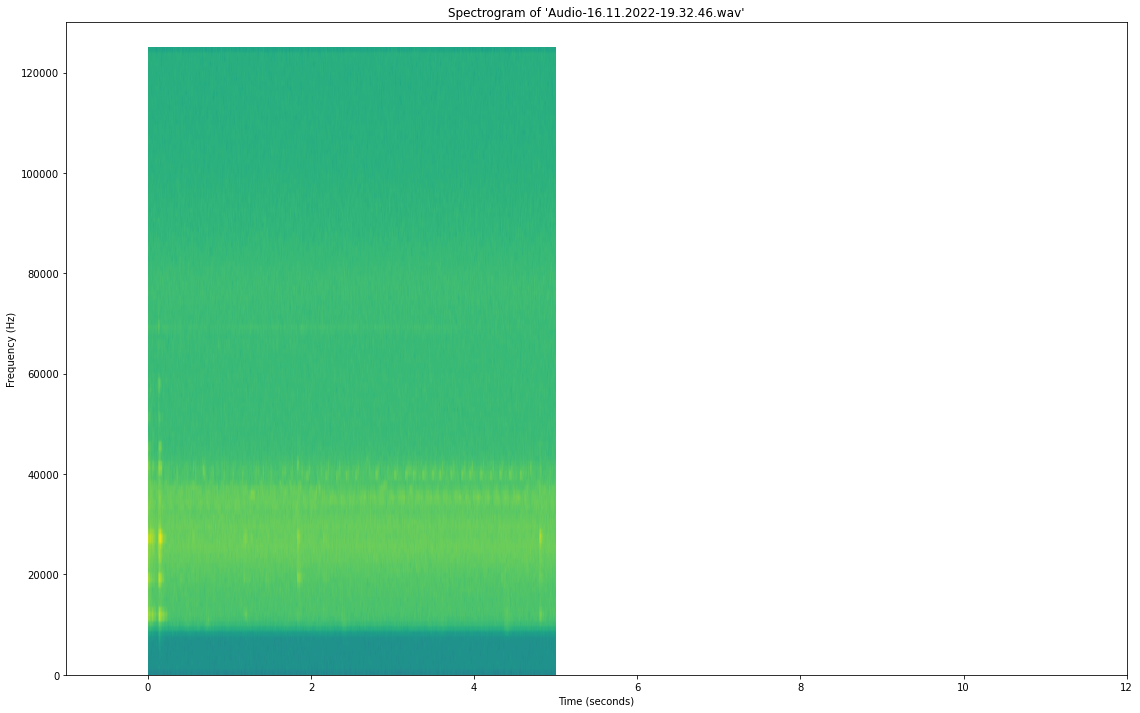

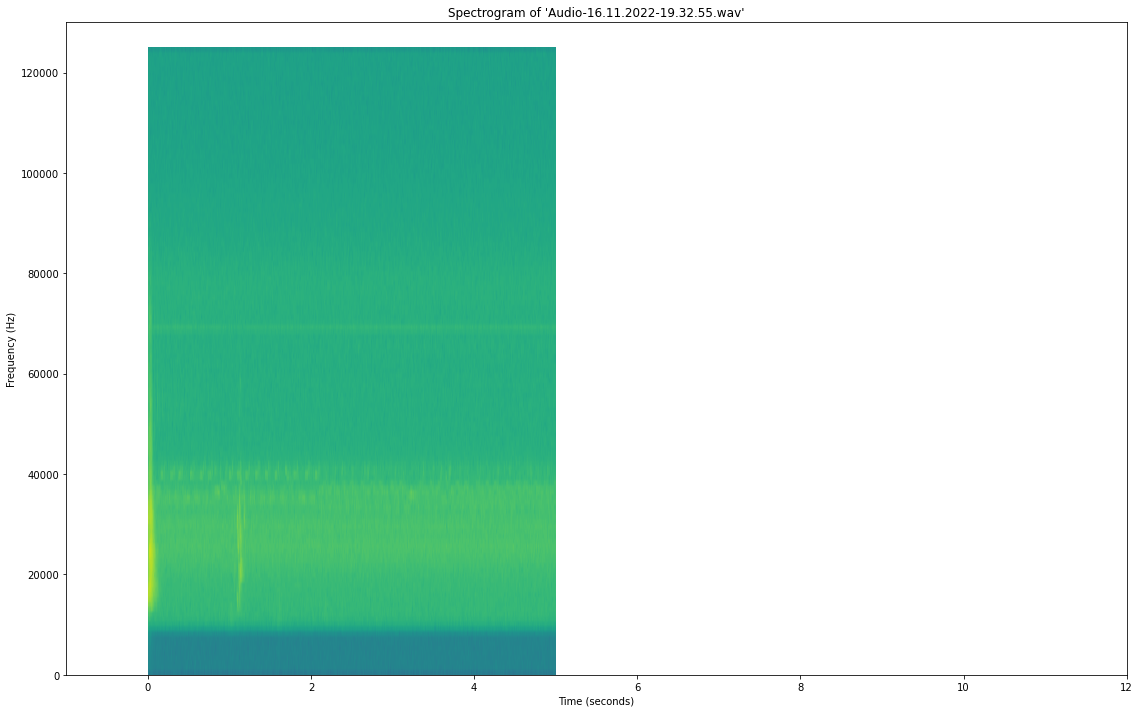

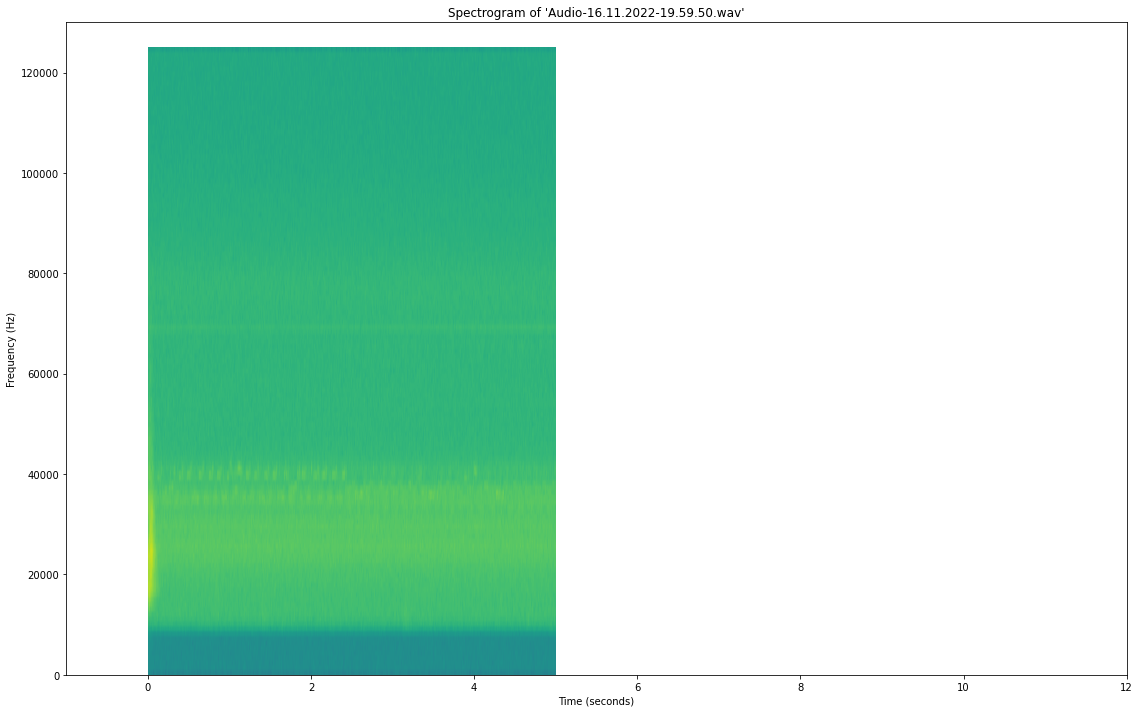

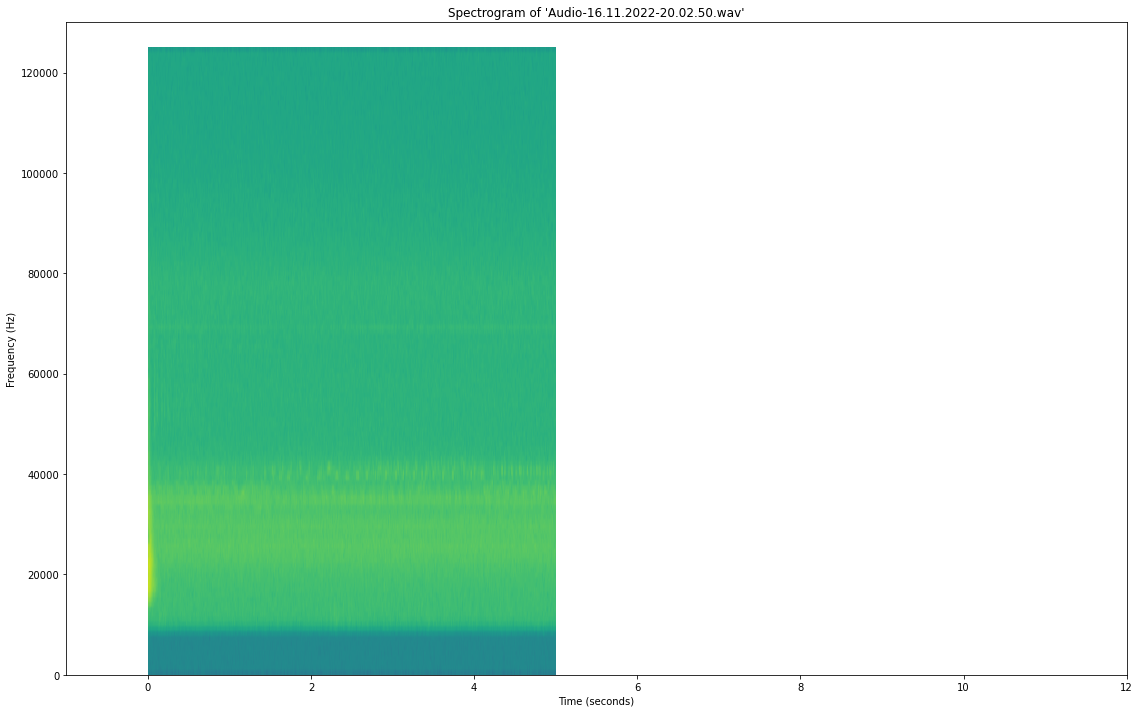

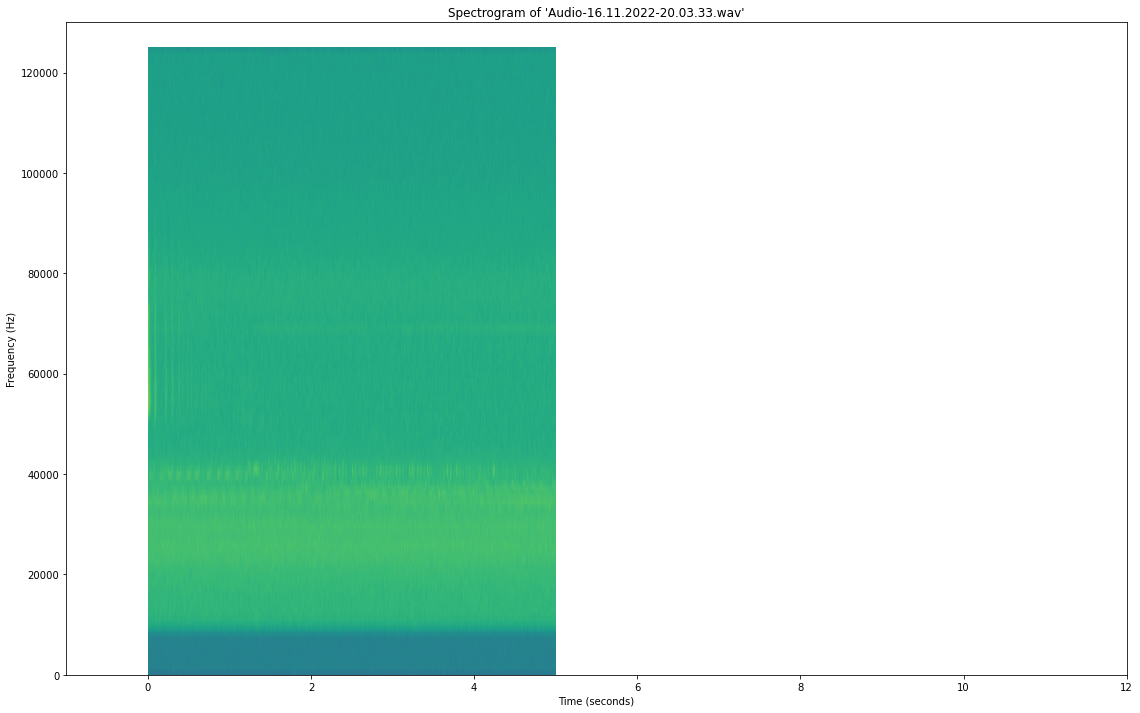

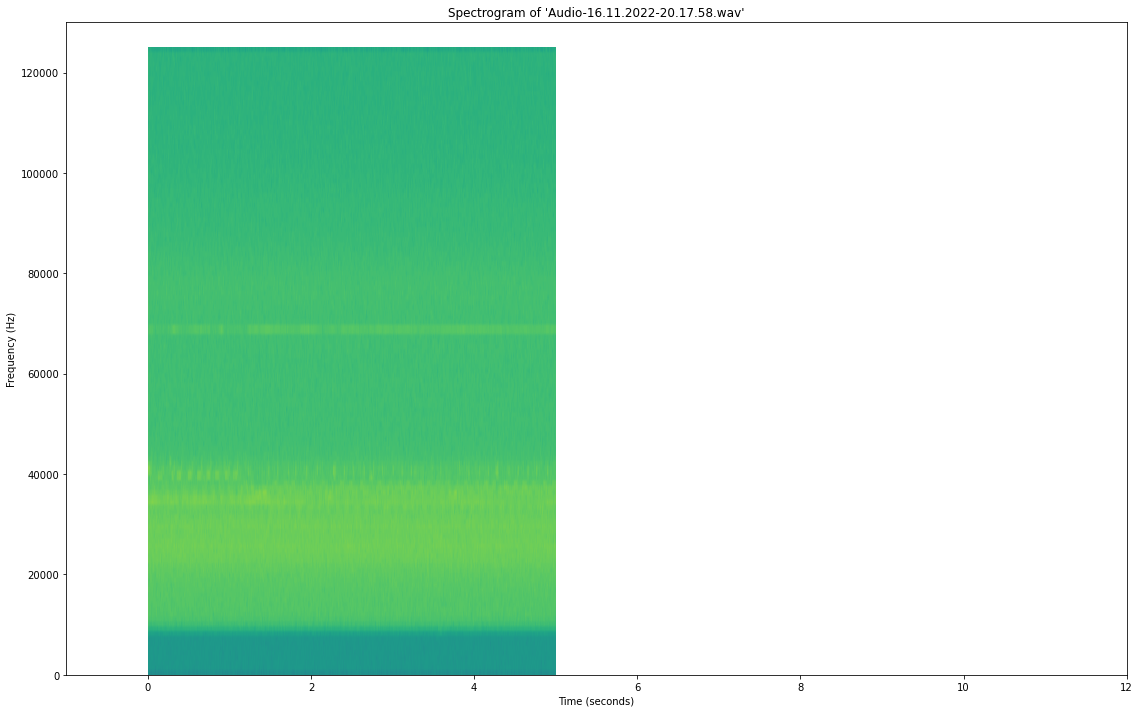

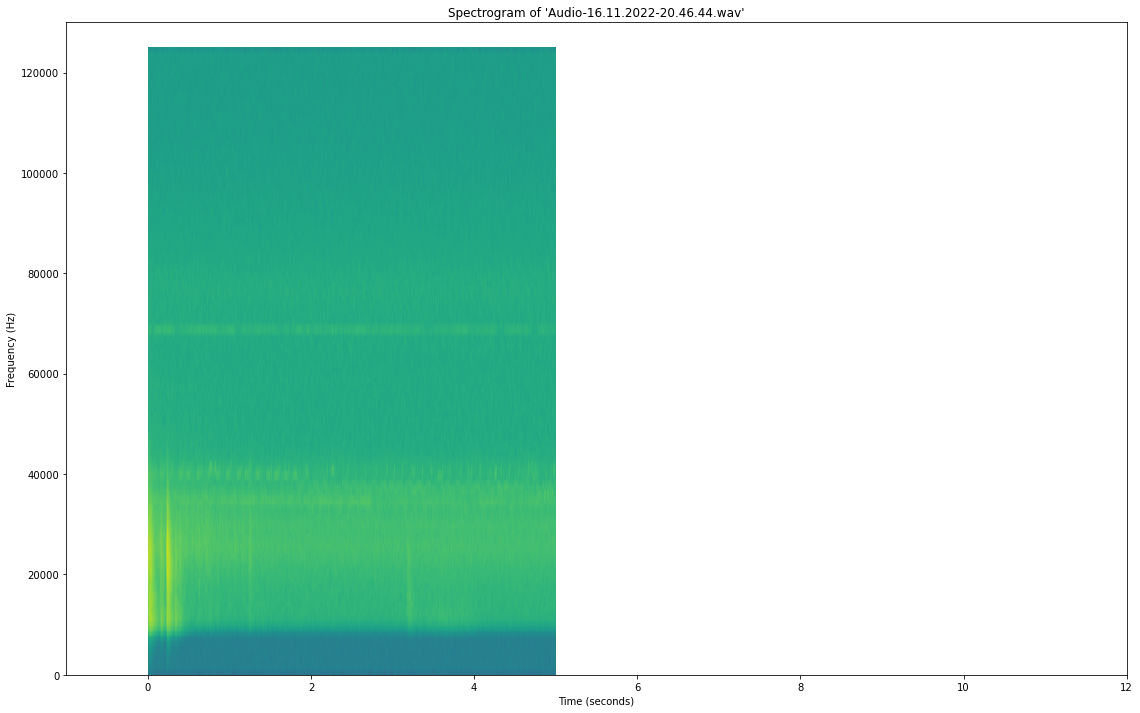

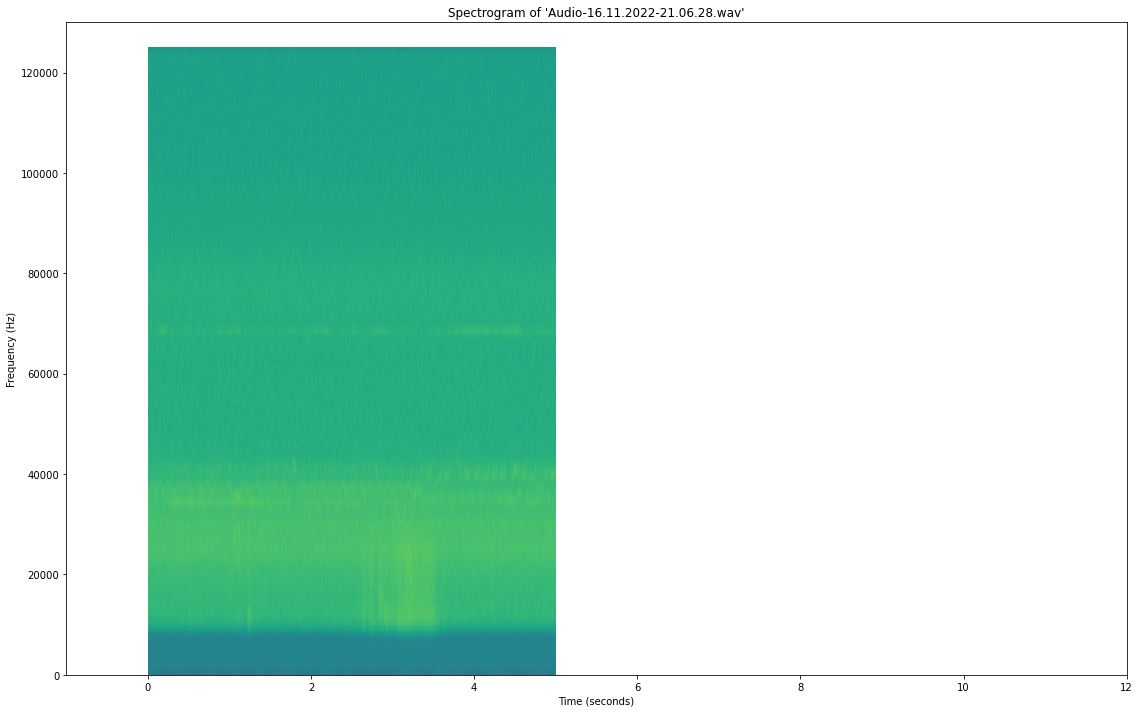

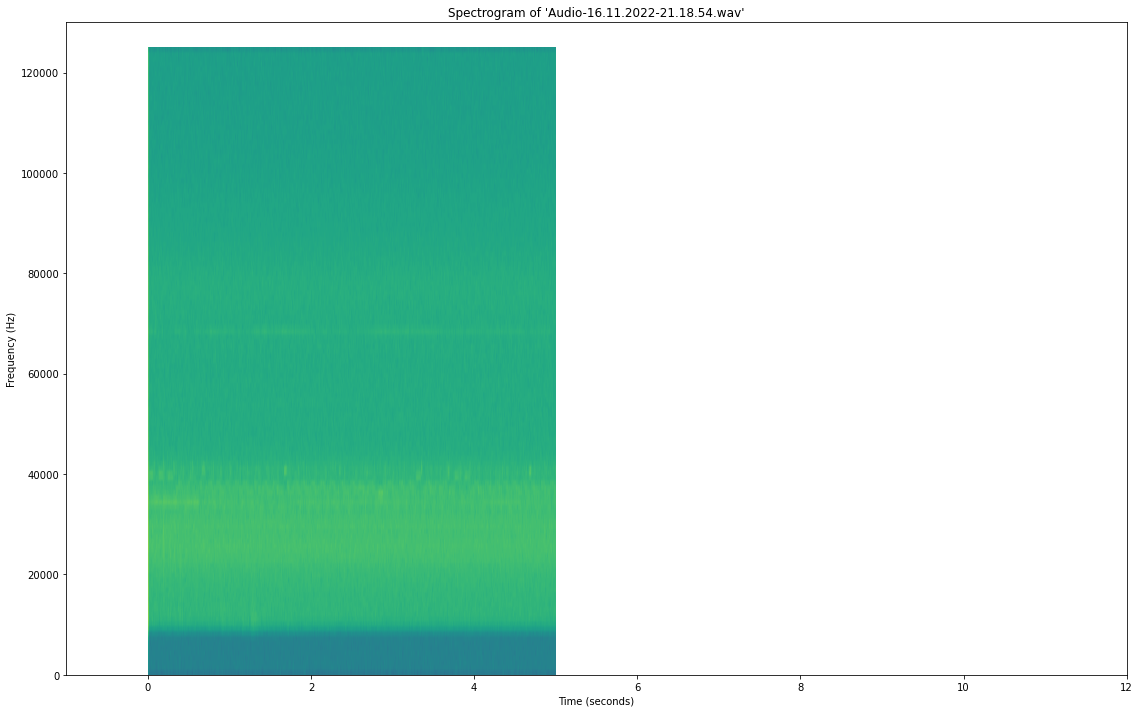

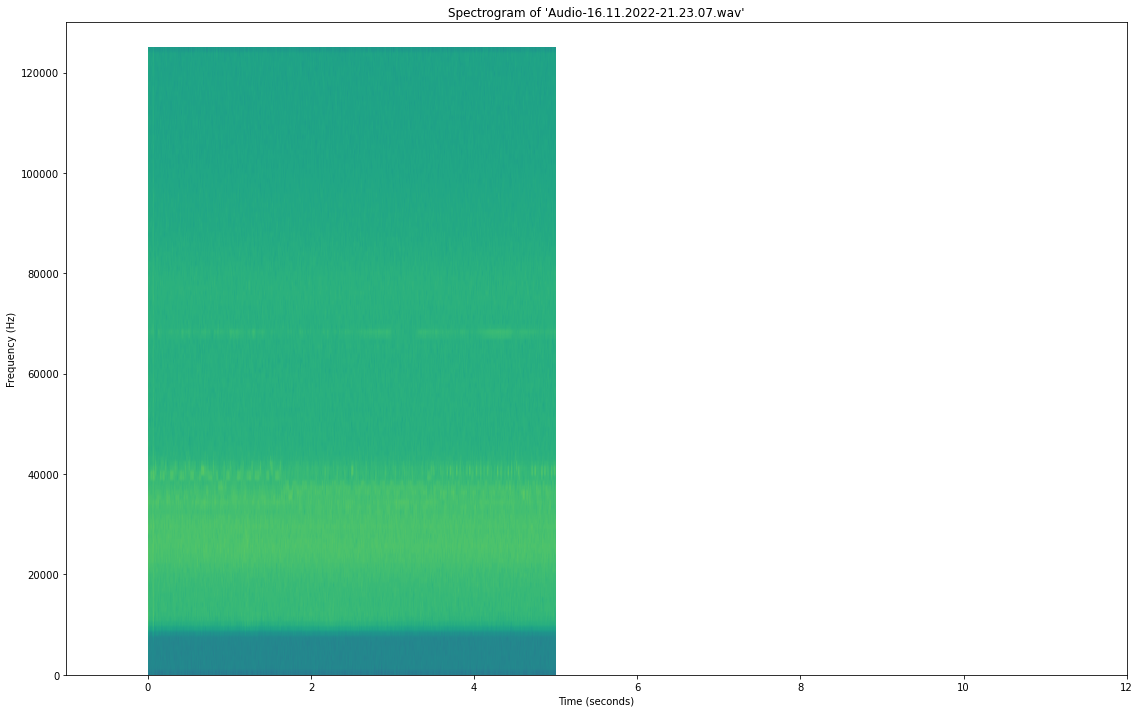

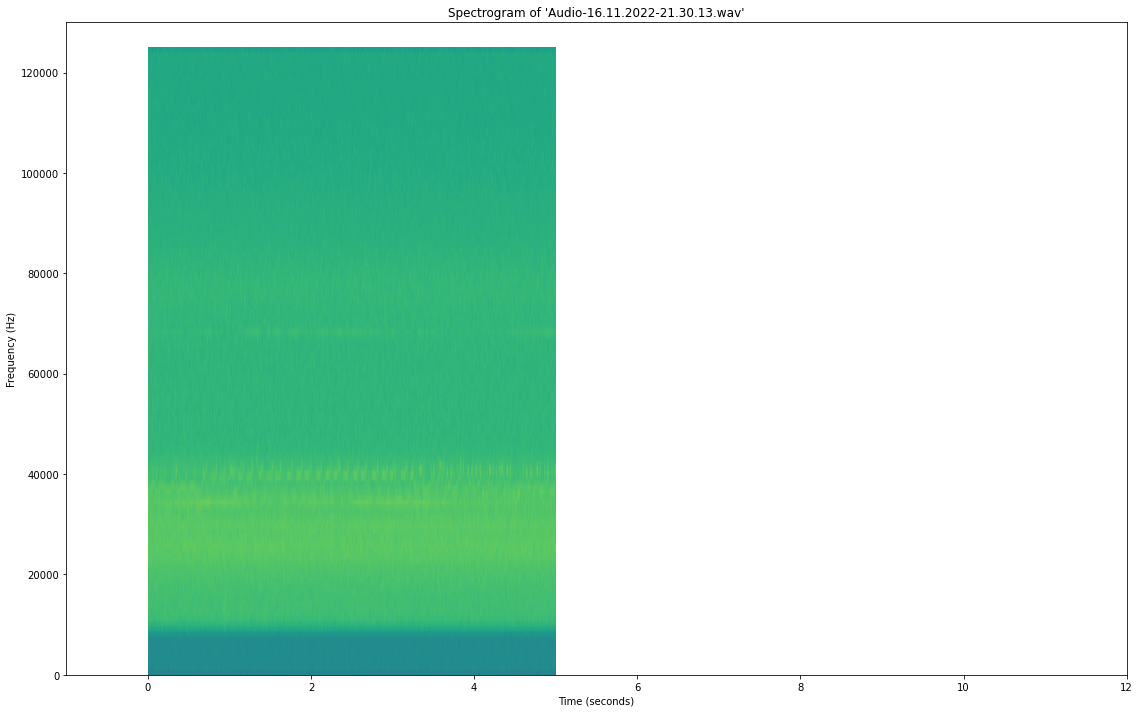

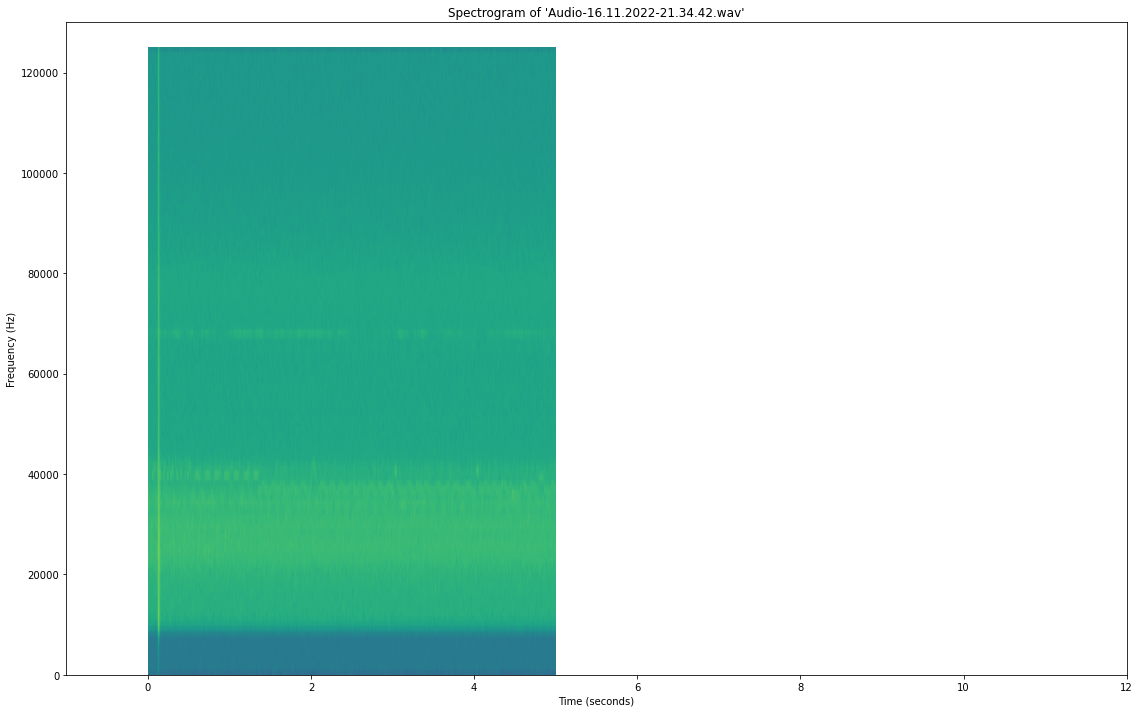

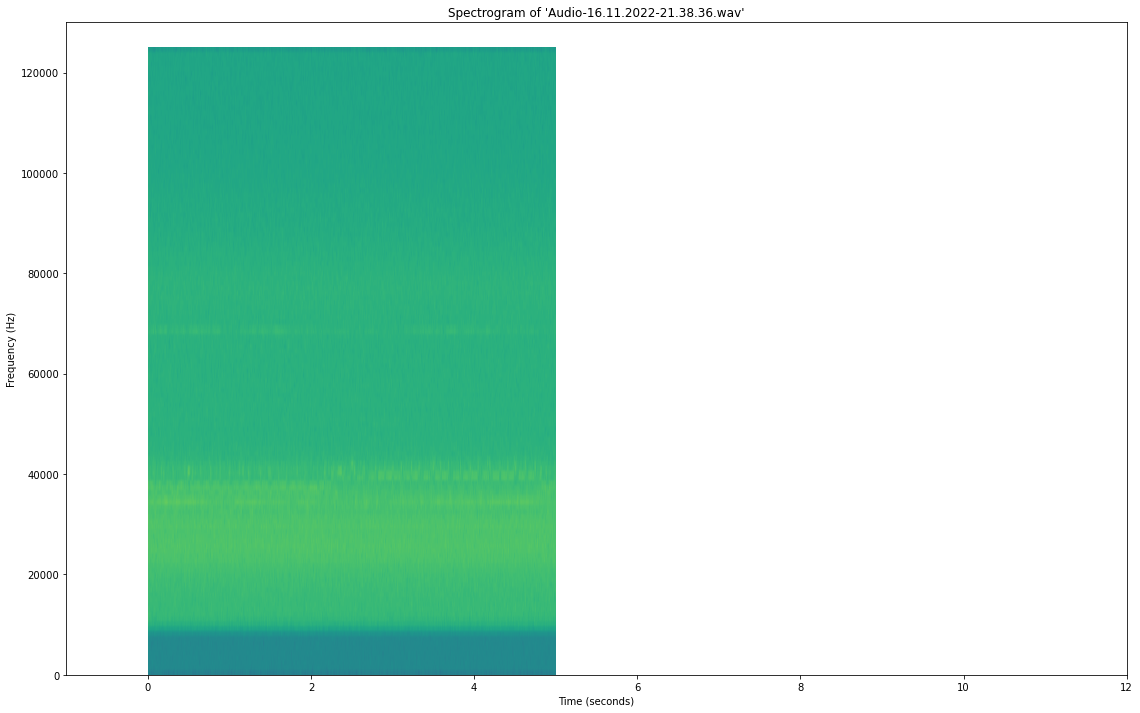

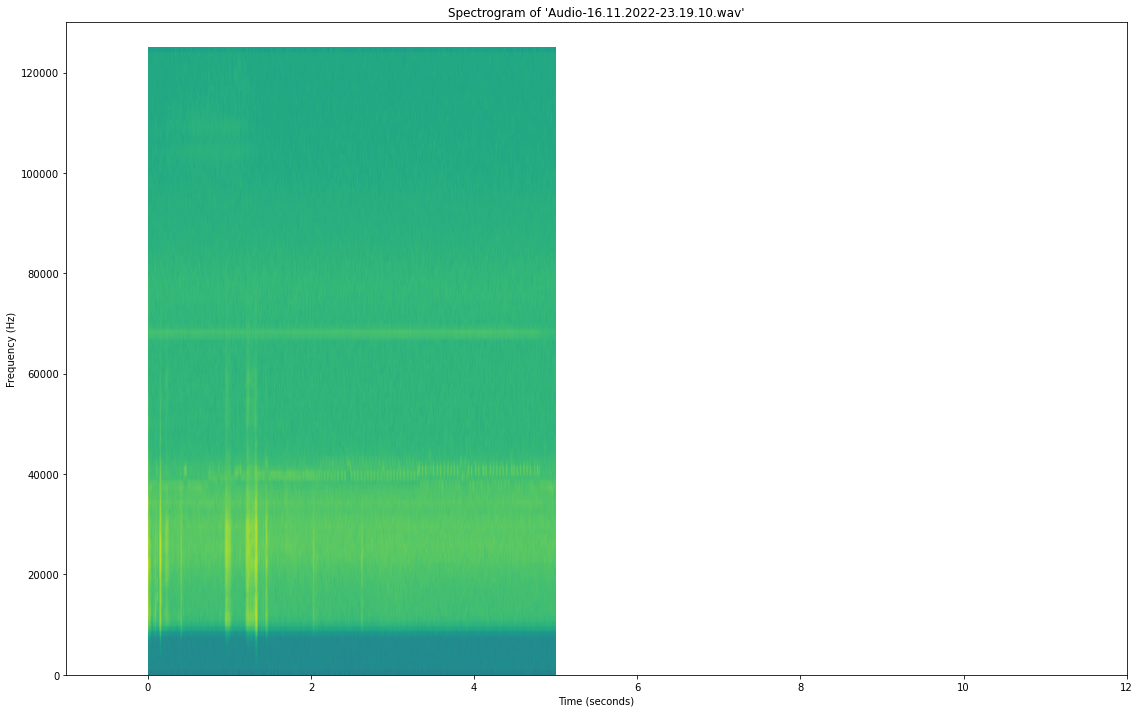

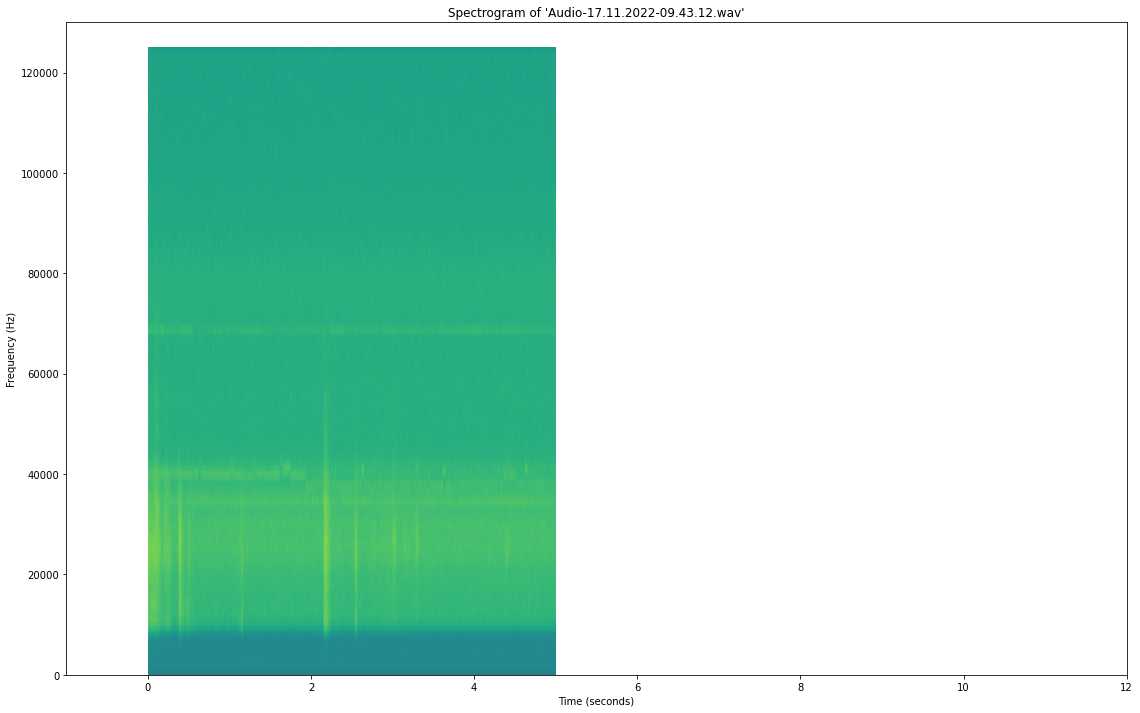

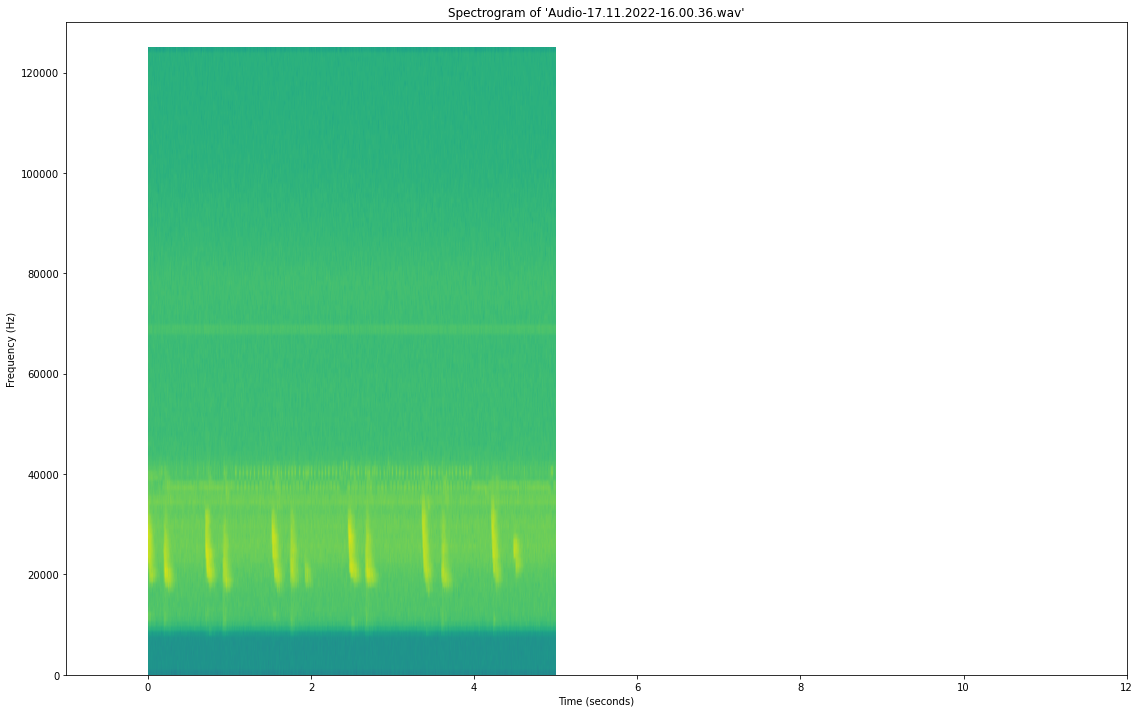

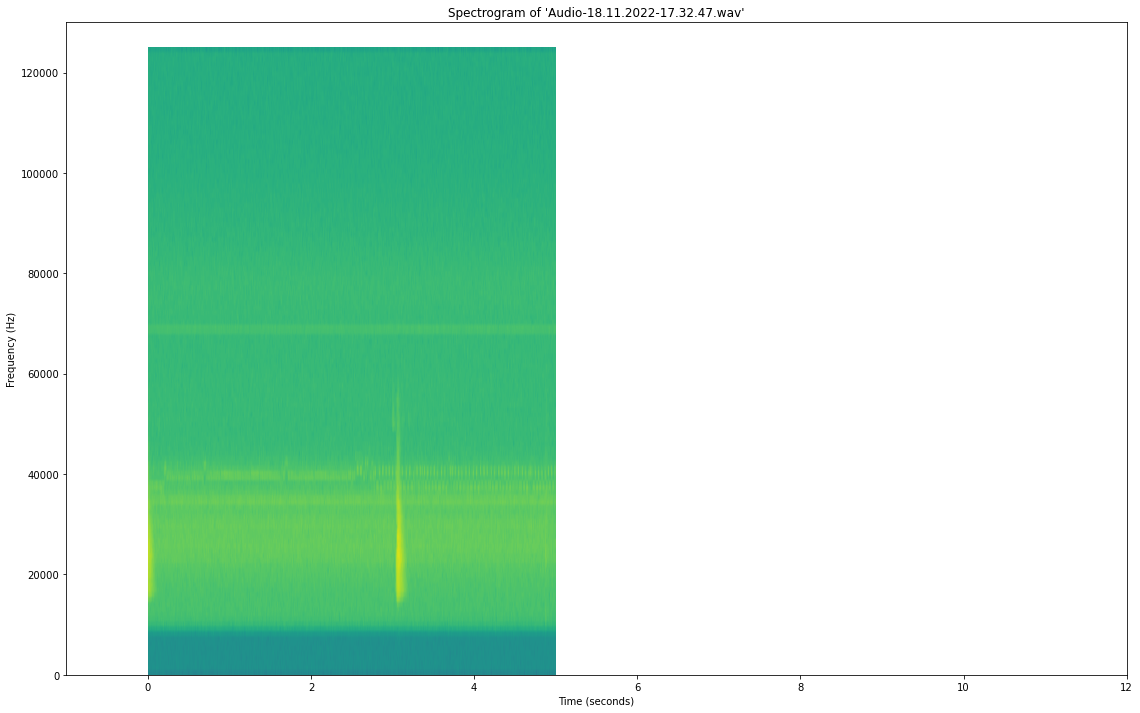

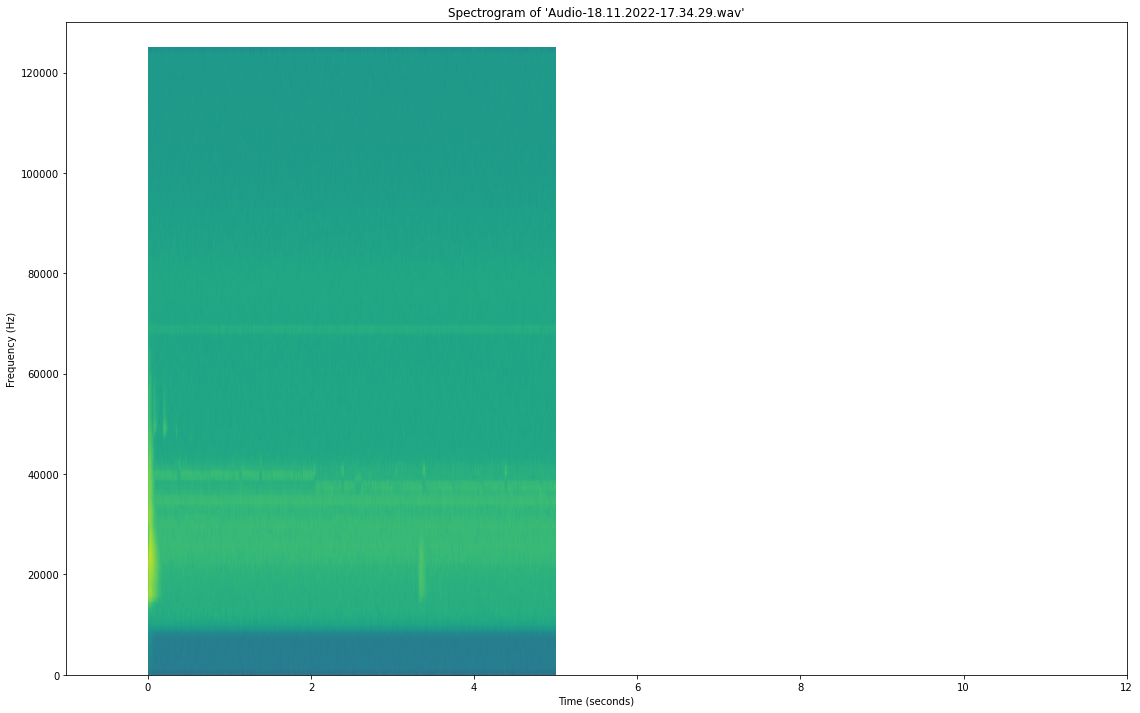

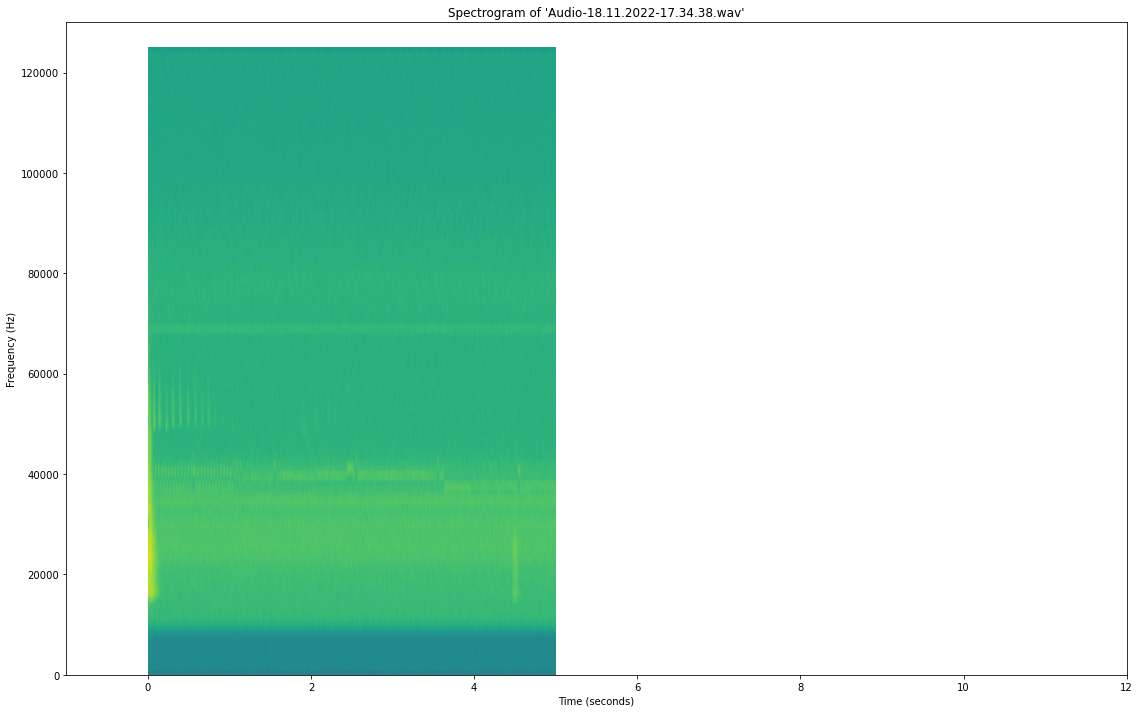

In [3]:
for i in range(0, len(files)):
    audio = (audio_no_ext[i])
    img_spec = (audio_no_ext[i]+'.png')
    
    # plot a spectrogram from the audio file
    def graph_spectrogram(wav_file):
        sound_info, frame_rate = get_wav_info(wav_file)
        pylab.figure(num=None, figsize=(19, 12))
        pylab.plot
        pylab.title('Spectrogram of %r' % wav_file)
        pylab.specgram(sound_info, Fs=frame_rate)
        plt.xlim(-1,12) # normalising the x and y axis means that the image will always be the same size
        plt.ylim(0,130000)
        plt.xlabel('Time (seconds)')
        plt.ylabel('Frequency (Hz)')
    
    def get_wav_info(wav_file):
        wav = wave.open(wav_file, 'r')
        frames = wav.readframes(-1)
        sound_info = pylab.frombuffer(frames, 'int16')
        frame_rate = wav.getframerate()
        wav.close()
        return sound_info, frame_rate
    
    graph_spectrogram(audio_no_ext[i] + '.wav') #plots spectrogram of .wav file
    plt.savefig(sub_folder + img_spec)  # saves fig of audio spectrogram

 Since the axis are the same for every single plot, the image axis and plot axis will always be equal
 
 100 on y axis image = top of spectrogram plot for all audio files

## Testing to make sure when I loop over the .png image files that they display correctly
This code will show just one of them but it checks the format

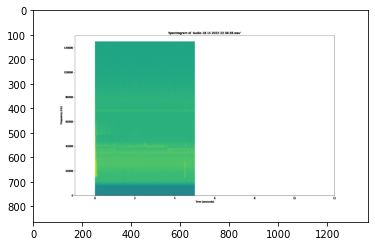

In [4]:
for i in range(0, len(spectrograms)):
    l = imageio.imread(sub_folder+spectrograms[i])
    plt.imshow(l)

## Variable Assignments
As there are alot of variables with similar names, it can be quite hard to remember which is which so this is a list to refer back to

In [5]:
#print(spectrogram_no_ext[1])              # file name without .png
#print(spectrograms[1])                    # gives the file name place no. [1] in the array
#print(spectrogram_no_ext[1] + '.png')     # also gives file name
#print(sub_folder+spectrograms[1])         # gives file location
#print(spectrograms)                       # gives all .png files in an array
#print(sub_folder2)                        # identifying/...
#print(sub_folder + spectrograms[1])       # full file location and name (within spec_images sub folder) 
#print(sub_folder2 + spectrograms[1])      # full file location and name (within identify sub folder)

## Template Matching
This plots the image of the spectrogram and then does a cross correlation analysis via template matching to identify parts 
of the image where there's a match

Click in the middle of some code (i.e. matchTemplate) and press shift and tab for more info

img_spec = name for the spectrograms im looping over

In [9]:
#loops over each image and applies the template matching and saves the identified plot images into the identifying folder

for i in range(0, len(spectrograms)):
    spectro = (sub_folder + spectrograms[i]) # finds the spectrogram .png files in the spec_images folder 

    # reads the images
    img = cv2.imread(spectro)                      # reads each image in
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    template = cv2.imread(call_template,0)         # reads the template in
    
    # runs template matching to get the minimum value
    res = cv2.matchTemplate(gray, template, cv2.TM_SQDIFF_NORMED) #sqdiff = square difference method
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # create threshold from minimum value and finds where sqdiff is less than the thresh
    min_thresh = (min_val + 1e-6) * 1.3          # 1.3 is basically the scaling factor
    """
    min_thresh is adjusted via scaling factor i.e. 1.6, this was done manually for the first audio recording analysed
    the higher the scaling factor the more "leeway" it gives so good for data with some variability
    if set to 1 would only identify something that is pixel perfect which for bats won't work
    Set too high and it will identify things not there
    Calls like a noctule where its a straight line and looks like background noise could be more challenging
    """
    match_locations = np.where(res<=min_thresh)
    
    
    # draw the template match box(es)
    w, h = template.shape[::-1]
    for (x, y) in zip(match_locations[1], match_locations[0]):
        cv2.rectangle(img, (x, y), (x+w, y+h), [0,255,255], 1)
    
    # save the images into my 'identifying' folder
    new_image =  spectrograms[i]
    cv2.imwrite(sub_folder2 + spectrograms[i], img)